<a href="https://colab.research.google.com/github/yvonnieh/CS4375-Assignment-1/blob/main/part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Linear Regression using Gradient Descent
<h4> CS 4375.001
<h4> Yvonne Hsiao
<h4> Deadline: 09/17/23

In [ ]:
# libaries
import numpy as np #for high-level mathematical functions to operate on multi-dimensional arrays
import matplotlib.pyplot as plt
import pandas as pd #for data manipulation and analysis
import seaborn as sns #for correlation visulization
import matplotlib.pyplot as matplt #for correlation visulization

In [ ]:
# load the dataset
url = 'https://raw.githubusercontent.com/yvonne-hsiao/Assignment1_Linear_Regression/main/winequality-red.csv'
df = pd.read_csv(url)

#Data Preprocessing
- Remove null or NA values
- Remove any redundant rows
- Convert categorical variables to numerical variables
- If you feel an attribute is not suitable or is not correlated with the
outcome, you might want to get rid of it.
- Any other pre-processing that you may need to perform

In [ ]:
# check for null or NA values
print("Null or NA values found?:", ("No\n" if df.isnull().sum().sum() == 0 else "Yes\n"))

# check for duplicate rows
print("Duplicate entries found?:", ("No\n" if df.duplicated().sum() == 0 else "Yes\n"))

# check if there is categorical values
print("Categorical values?:")
print(df.dtypes)

# print dataset description
print("\nDescription of the dataframe:")
print(df.describe())

Null or NA values found?: No

Duplicate entries found?: Yes

Categorical values?:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide       int64
total sulfur dioxide      int64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Description of the dataframe:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.20

In [ ]:
# remove any redundant rows
df = df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
#subset: column label or sequence of labels, optional
#keep{‘first’, ‘last’, False}, default ‘first’: keep [] after delete
#inplace: bool, default False. to modify the DataFrame rather than creating a new one.
#ignore_indexbool, default False

# print dataset info after removal of redundant rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   int64  
 6   total sulfur dioxide  1359 non-null   int64  
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 138.0 KB


<h3> Find the correlation using different graphs




Attributes correlation on quality variable in decending order:
quality                 1.000000
alcohol                 0.480343
volatile acidity        0.395214
sulphates               0.248835
citric acid             0.228057
density                 0.184252
total sulfur dioxide    0.177862
chlorides               0.130988
fixed acidity           0.119024
pH                      0.055245
free sulfur dioxide     0.050343
residual sugar          0.013640
Name: quality, dtype: float64


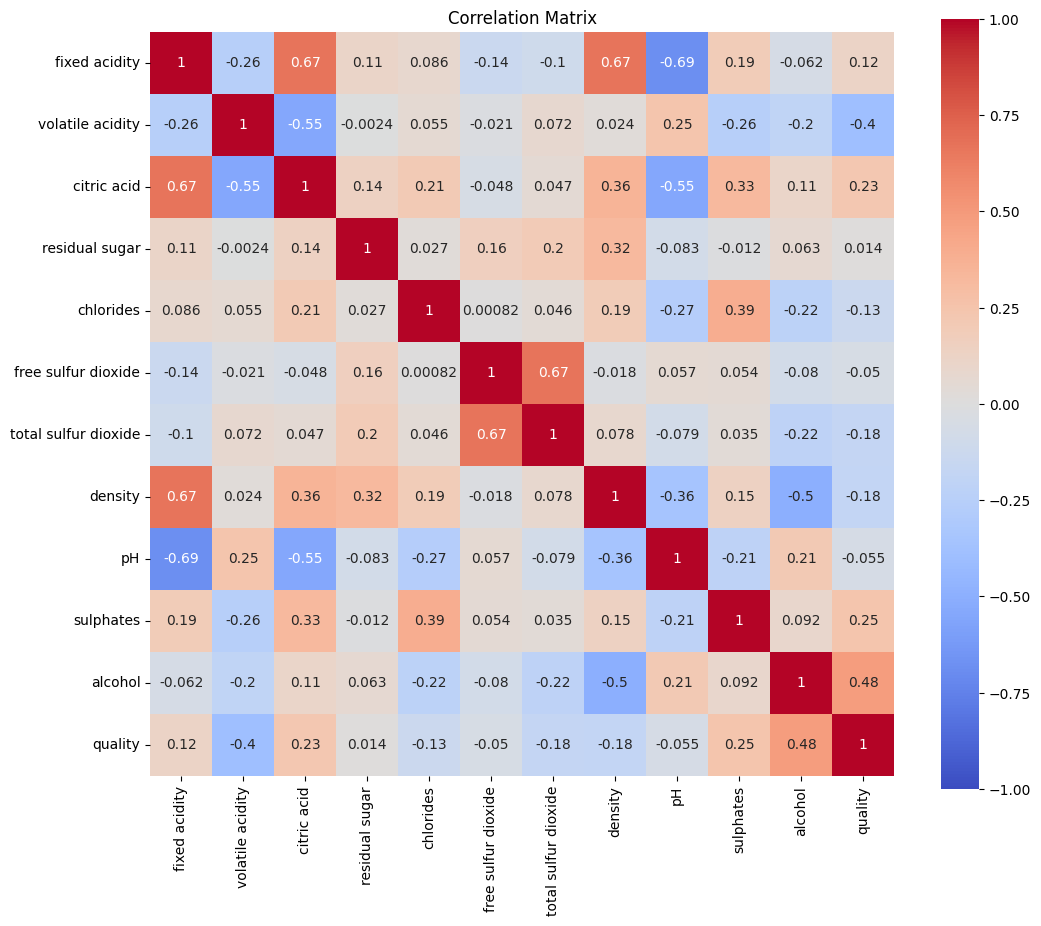

In [ ]:
# Print the correlation of different attribute on 'quality' variable
print("\nAttributes correlation on quality variable in decending order:")
print(abs(df.corr())['quality'].sort_values(ascending = False))

# Visualization of the correlation in heatmap
def show_correlation_matrix(data):
    # Compute the correlation matrix
    corr = data.corr()

    # Plot the heatmap
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
    plt.title('Correlation Matrix')
    plt.show()
show_correlation_matrix(df)

<Axes: >

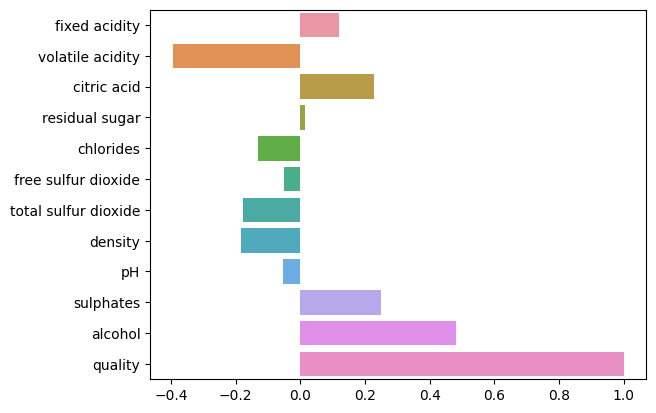

In [ ]:
# Checking the correlation of all the attributes vs the quality variable
sns.barplot(y = df.corr().loc['quality'].index, x = df.corr().loc['quality'].values)

In [ ]:
# high correlation attributes: volatile acidity, citric acid, sulphates, alcohol, and density
df = df[['volatile acidity', 'citric acid', 'sulphates', 'alcohol', 'density', 'quality']]
column_names = ['Volatile acidity', 'Citric acid', 'Sulphates', 'Alcohol', 'Density']

# Build the model

<h3> Splitting dataset into training and testing in 80/20 ratio

In [ ]:
# split the dataset into training and test
training_data = df.sample(frac=0.8, random_state=25)
testing_data = df.drop(training_data.index)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

# assign training set features and targets and convert to numpy array
X_train = training_data.drop('quality', axis=1).values
Y_train = training_data['quality'].values

# assign test set features and targets and convert to numpy array
X_test = testing_data.drop('quality', axis = 1).values
Y_test = testing_data['quality'].values

No. of training examples: 1087
No. of testing examples: 272


<h3> Gradient function for this model and generic gradient descent function

In [ ]:
# gradient function for this prediction model
def ssr_gradient(x, y, w):
    # Compute the residuals
    res = (w[0] + w[1] * x[:,0] + w[2] * x[:,1] + w[3] * x[:,2] + w[4] * x[:,3] + w[5] * x[:,4]) - y

    # Compute the gradient
    grad_w0 = res.mean()
    grad_w1 = (res * x[:,0]).mean()
    grad_w2 = (res * x[:,1]).mean()
    grad_w3 = (res * x[:,2]).mean()
    grad_w4 = (res * x[:,3]).mean()
    grad_w5 = (res * x[:,4]).mean()


    return grad_w0, grad_w1, grad_w2, grad_w3, grad_w4, grad_w5


In [ ]:
# generic function to minimize any convex function
def gradient_descent(gradient, x, y, start, learn_rate, n_iter, tolerance):
  vector = start
  mse_list = []

  for _ in range(n_iter):
    diff = -learn_rate * np.array(gradient(x, y, vector))

    # Compute and store the MSE for this iteration
    predicted = vector[0] + np.dot(x, vector[1:])
    mse = np.mean((predicted - y) ** 2)
    mse_list.append(mse)

    if np.all(np.abs(diff) <= tolerance):
      break

    vector += diff

  return vector, mse_list

<h3> Train and predict, return f(x)

In [ ]:
def train_and_predict_with_params(X, Y, params):
    # Extract parameters
    learn_rate = params['learn_rate']
    n_iter = params['n_iter']
    tolerance = params['tolerance']

    # Initial weights
    start = np.zeros(X.shape[1] + 1)

    # Train using gradient descent
    weights, mse_val = gradient_descent(ssr_gradient, X, Y, start, learn_rate, n_iter, tolerance)

    # Find predict value
    Y_pred = weights[0] + np.dot(X, weights[1:])

    return Y_pred

<h3> Evaluation statistics (MSE and R^2)

In [ ]:
# Find MSE
def mse(y_true, y_pred):
    return ((y_true - y_pred) ** 2).mean()

# Find R^2
def r_squared(y_true, y_pred):

    # Calculate the mean value of actual y
    y_mean = np.mean(y_true)

    # Calculate SSres and SStot
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - y_mean) ** 2)

    # Calculate R^2
    r2 = 1 - (ss_res / ss_tot)

    return r2

# Model Evaluation and Log File

In [ ]:
# libary for log file
import csv

<h3> Setup the log file

In [ ]:
# function to log trails
def log_trial(filename, params, r2, mse):
    with open(filename, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([params['learn_rate'], params['n_iter'], params['tolerance'], r2, mse])

# initialize the log file
def initialize_log(filename):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Learning Rate", "Number of Iterations", "Tolerance", "R^2", "MSE"])

<h3> Conduct trails and log

In [ ]:
# initialize the best metrics to a high value for MSE and a low value for R^2
best_mse = float('inf')
best_r2 = -float('inf')
best_params = None
optimal_weights = None

# initialize file name to 'tuning_log'
initialize_log('tuning_log.csv')

# set of hyperparameters
hyperparameters = [
    {'learn_rate': 0.001, 'n_iter': 100, 'tolerance': 1e-6},
    {'learn_rate': 0.01, 'n_iter': 100, 'tolerance': 1e-6},
    {'learn_rate': 0.1, 'n_iter': 100, 'tolerance': 1e-6},
    {'learn_rate': 0.01, 'n_iter': 100, 'tolerance': 1e-3},
    {'learn_rate': 0.001, 'n_iter': 200, 'tolerance': 1e-6},
    {'learn_rate': 0.01, 'n_iter': 100, 'tolerance': 1e-10},
    {'learn_rate': 0.01, 'n_iter': 800, 'tolerance': 1e-6},
    {'learn_rate': 0.01, 'n_iter': 10000, 'tolerance': 1e-6},
    {'learn_rate': 0.01, 'n_iter': 100000, 'tolerance': 1e-6},
    {'learn_rate': 0.01, 'n_iter': 100000, 'tolerance': 1e-10},
    {'learn_rate': 0.01, 'n_iter': 100000, 'tolerance': 1e-100}

]

for params in hyperparameters:
    Y_train_pred = train_and_predict_with_params(X_train, Y_train, params)
    r2 = r_squared(Y_train, Y_train_pred)
    trails_mse = mse(Y_train, Y_train_pred)
    log_trial('tuning_log.csv', params, r2, trails_mse)

    # Check if this is the best performance so far
    if trails_mse < best_mse:
        best_mse = trails_mse
        best_r2 = r2
        best_params = params

# find the optimal weight with parameters with best results
start = np.zeros(X_train.shape[1] + 1)
optimal_weights, mse_val = gradient_descent(ssr_gradient, X_train, Y_train, start,
                                            best_params['learn_rate'], best_params['n_iter'],
                                            best_params['tolerance'])

# print the best results
print("Best Performance Results:")
print("Optimal weights:", optimal_weights)
print("MSE:", best_mse)
print("R^2:", best_r2)
print("\n")
print("Best Parameters for Model Training:")
print("Learning Rate:", best_params['learn_rate'])
print("Number of Iterations:", best_params['n_iter'])
print("Tolerance:", best_params['tolerance'])



Best Performance Results:
Optimal weights: [ 1.17069263 -1.29103964 -0.18033913  0.64233299  0.34022904  1.20532388]
MSE: 0.4236893961146268
R^2: 0.36265944890033686


Best Parameters for Model Training:
Learning Rate: 0.01
Number of Iterations: 100000
Tolerance: 1e-10


<h3> Model evaluation for testing set

In [ ]:
Y_test_pred = optimal_weights[0] + np.dot(X_test, optimal_weights[1:])
test_mse = mse(Y_test, Y_test_pred)
r2 = r_squared(Y_test, Y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(test_mse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for testing set
--------------------------------------
MSE is 0.5374187313598163
R2 score is 0.25996896551286774




# Graphs (Plots)

<h3> MSE vs. Number of Iterations

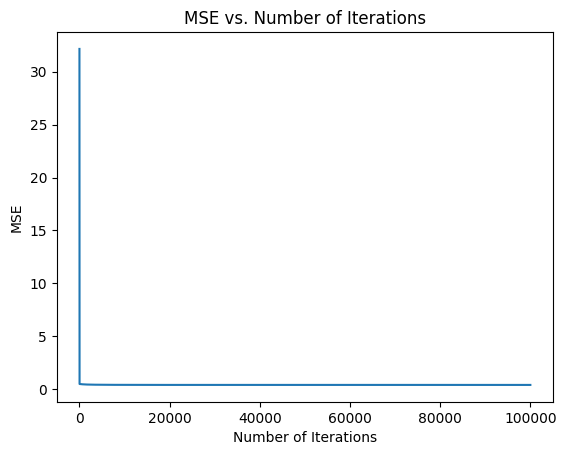

In [ ]:
# MSE vs n_iter: with the best parameters
plt.plot(mse_val)
plt.xlabel('Number of Iterations')
plt.ylabel('MSE')
plt.title('MSE vs. Number of Iterations')
plt.show()

<h3> Output Variable Plotted Against Important Attributes

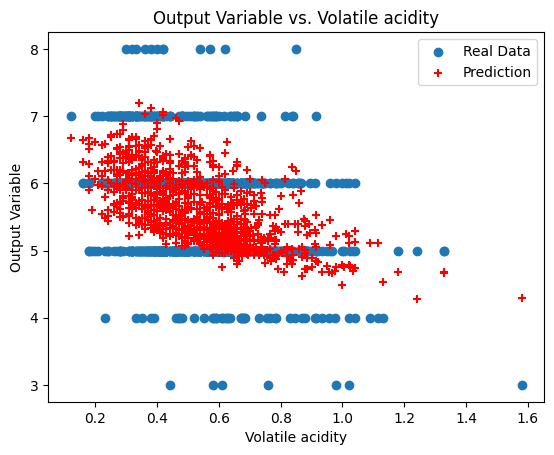

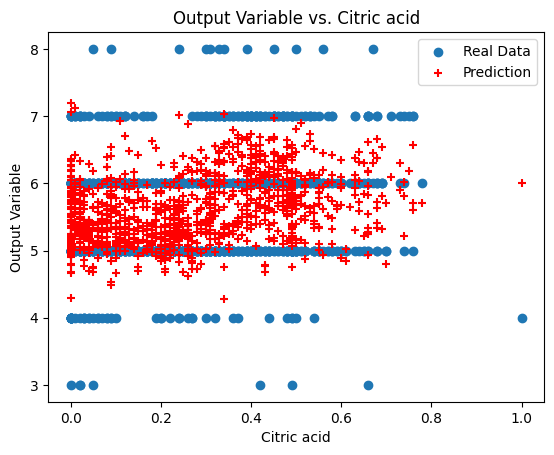

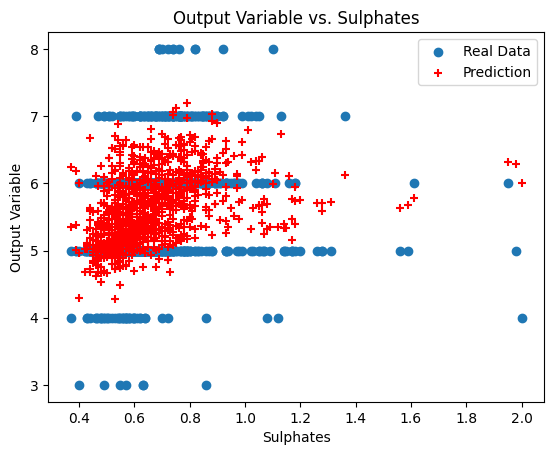

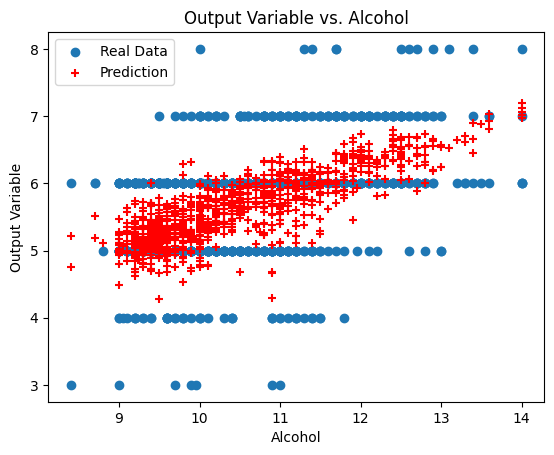

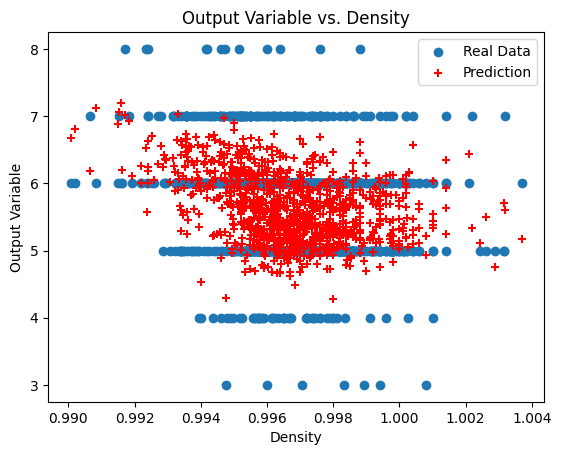

In [ ]:
for i, col_name in enumerate(column_names):
    plt.scatter(X_train[:, i], Y_train, label='Real Data')
    plt.scatter(X_train[:, i], optimal_weights[0] + np.dot(X_train, optimal_weights[1:]), label='Prediction', color='red', marker='+')
    plt.xlabel(col_name)
    plt.ylabel('Output Variable')
    plt.title(f'Output Variable vs. {col_name}')
    plt.legend()
    plt.show()

<h3> Actual vs. Predicted Plot

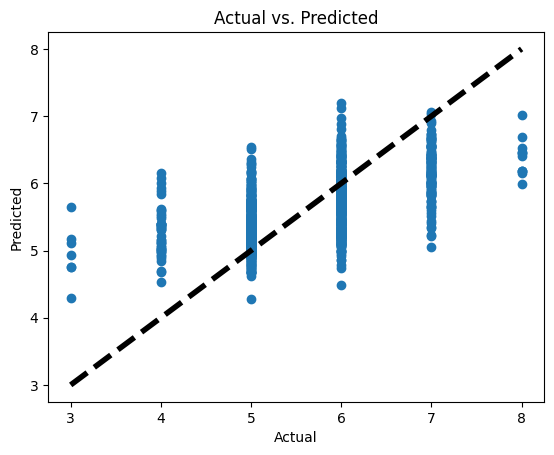

In [ ]:
plt.scatter(Y_train, Y_train_pred)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()